## Acknowledgement

If you would like to use this model in your own research, please cite Angelo et al. 2024 (insert ADS link).

## Description

This program allows users to inspect and classify stars with published Gaia RVS spectra. In this tutorial, we demonstrate how to determine stellar labels $T_{\rm eff}$, log$g$, [Fe/H], [$\alpha$/Fe], and $v_{\rm broad}$ from an input Gaia RVS spectrum. We also show how to plot the spectrum to look for signs of activity, binary companions, and other anomalous behavior. For more in depth instructions for interpreting these plots, see Angelo et al. (2024).

For this tutorial, we will use KOI-409, which is a main sequence single star. To see examples of what the labels and plots might look like for different types of stars, you can replace the `spectrum_path` variable with paths to other examples we provide:

- main sequence single star: `./data/Kepler-93.csv`
- unresolved binary: `./data/GaiaDR3-1535964555128078720.csv`
- noisy spectrum: `./data/KOI-001.csv`
- evolved star: `./data/HD176650.csv`
- active star: `./data/GaiaDR3-3174658066485297152.csv`

## Installation

Download the code directly from GitHub, or clone the repository:

`git clone https://github.com/isabelangelo/gaiaspec`


## Download the Gaia RVS spectrum for the object of interest

1. Navigate to the [Gaia archive](https://gea.esac.esa.int/archive/) and select “Search” in the top right corner
2. Type the name of the object of interest (e.g., KOI-3, HD 176550, Gaia DR3 4268620287278693120, KIC 2051012738300892416) in the search box.
3. Click “Show Query” at the bottom of the page
4. Click “Submit Query” under the query box and wait for the job to show up below.
5. Select the link icon to the far right of the query (text should read “Search associated data in datalink” when the cursor hovers over it)
6. Next to “Download Format”, select “CSV” from the dropdown Menu 
7. Select the download icon next to “RVS mean spectra -- designation” (note: if you don't see this, your object of interest may not have a published RVS spectrum yet).
8. Unzip the downloaded RVS spectrum and move it into the `gaiaspec/data/` directory


## Display labels and plots

Create a `Spectrum` object specific to the object of interest:


In [1]:
from spectrum import *

# example spectrum for Kepler-93 (KOI-1925, KIC 9955598)
# replace this with the path to the downloaded spectrum
spectrum_path = './data/Kepler-93.csv'
spec = Spectrum(spectrum_path)

Display the Cannon output stellar labels and metrics:

In [2]:
spec.data_table()

Teff (K),logg (dex),[Fe/H] (dex),[alpha/Fe] (dex),Vbroad (km/s),log$\chi^2$,log$\rho(l_n)$,log$\chi_{\rm Ca}^2$,log$\Delta\chi^2$,SNR
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5566.16,4.39,-0.12,0.03,5.73,3.30,-2.73,2.56,1.05,127.10


Plot the RVS spectrum, the best-fit Cannon model and its residuals, and the stellar properties and metrics. The distribution of labels and metrics for a population of main sequence single stars is plotted here as histograms for reference.

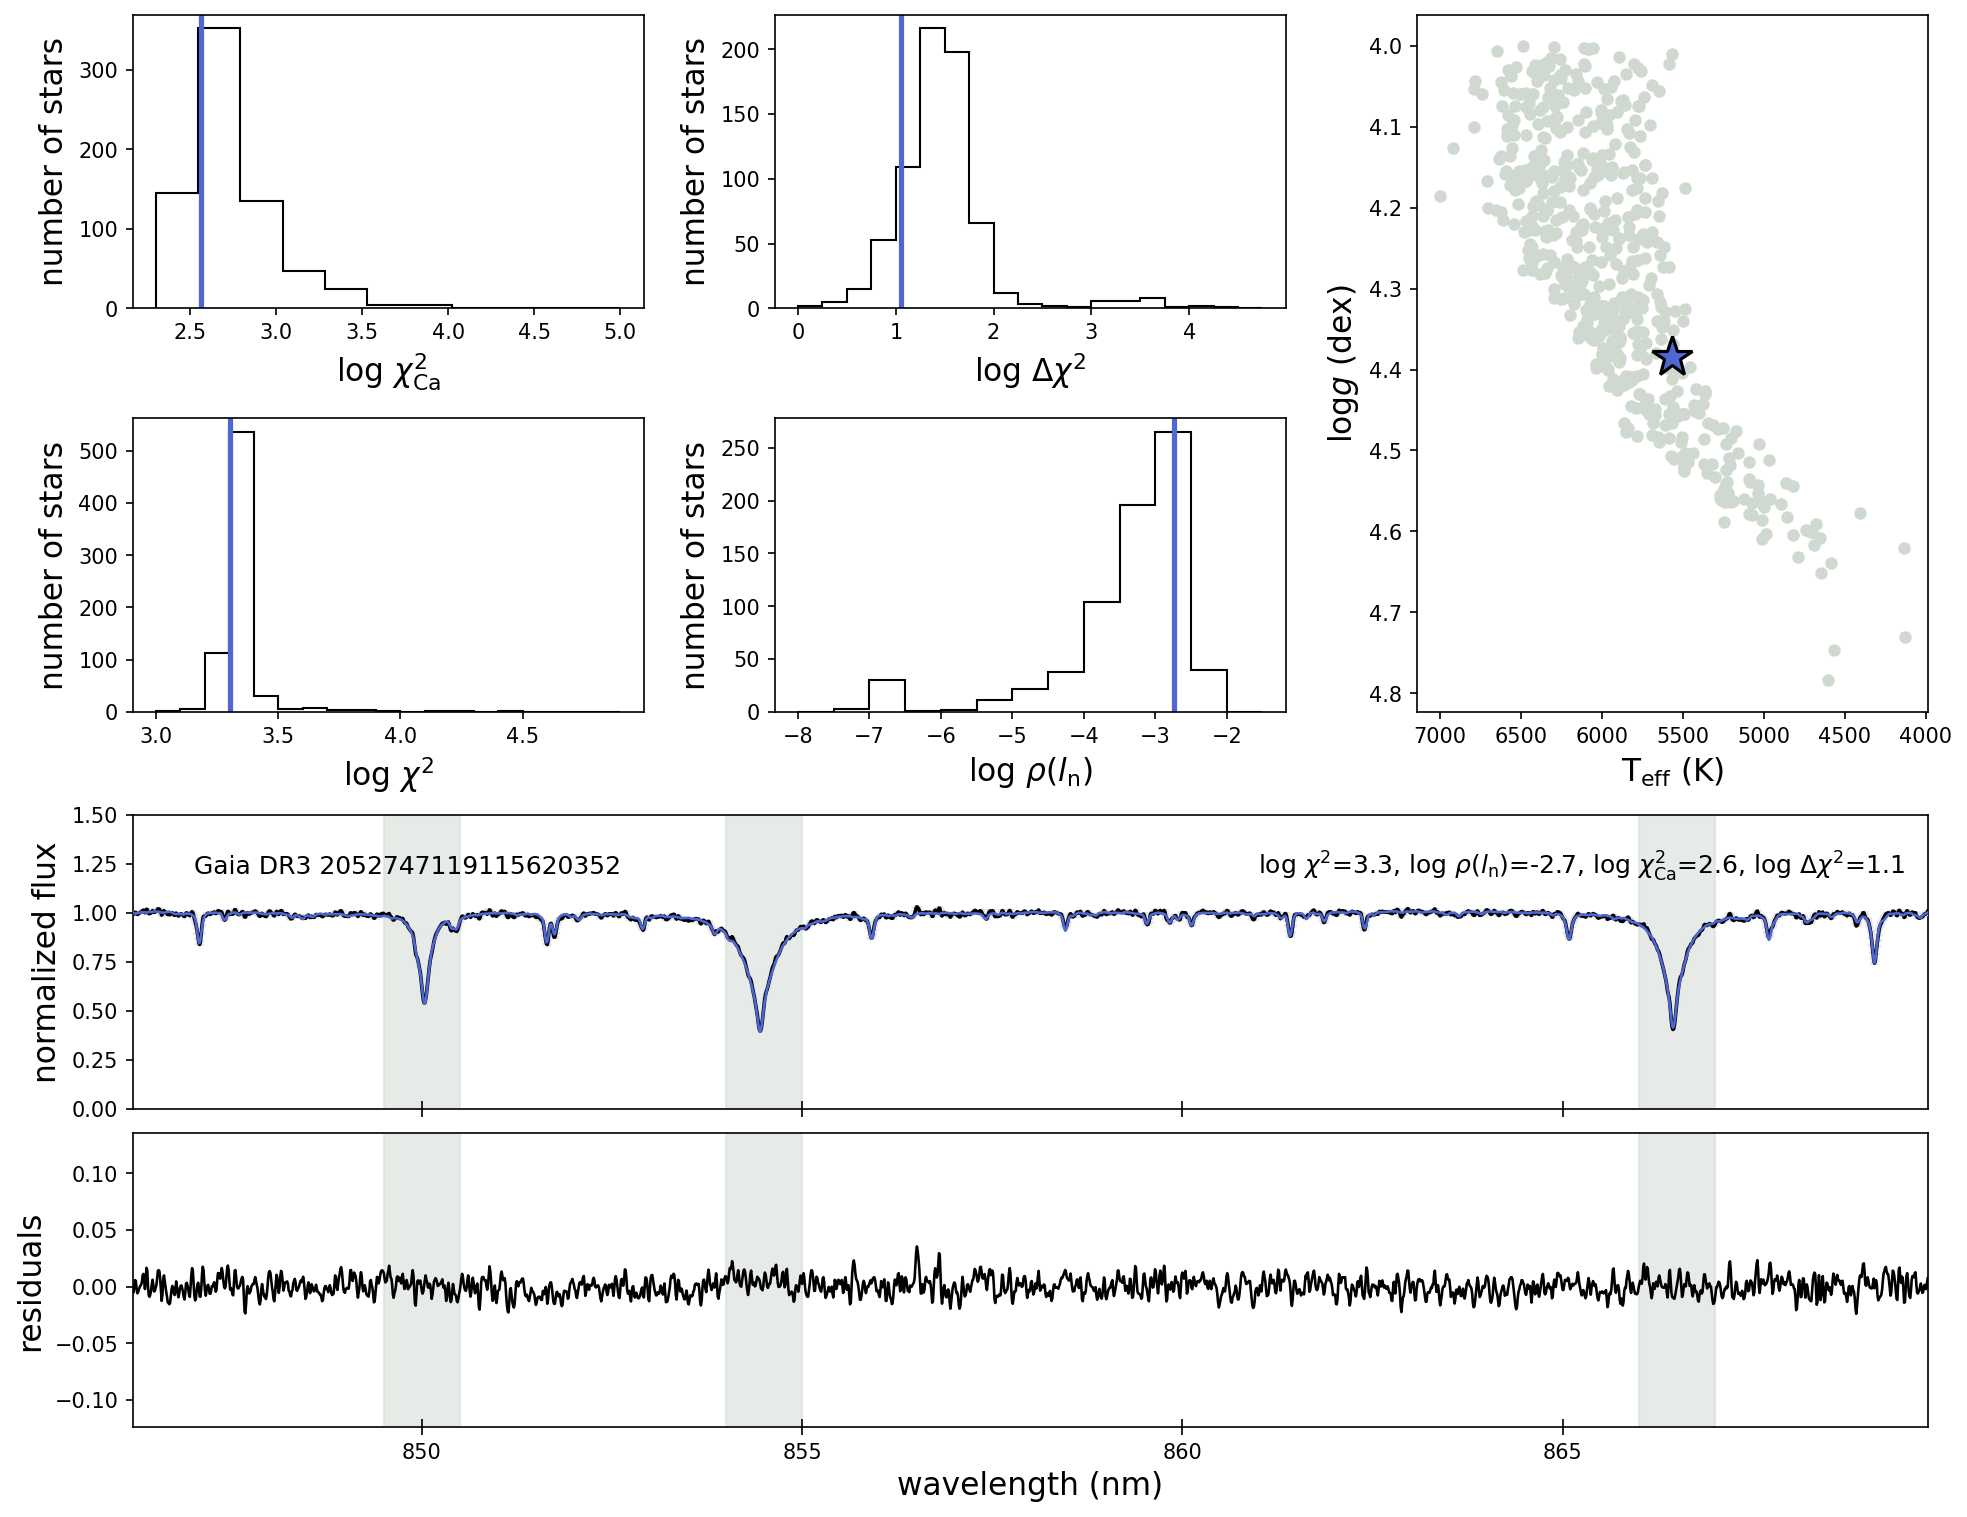

In [3]:
spec.spectrum_plot()

We can also generate plots to look for signs of activity (indicated by a large chi-squared Ca) and inspect the equivalent widths of the residuals at the Ca-triplet:

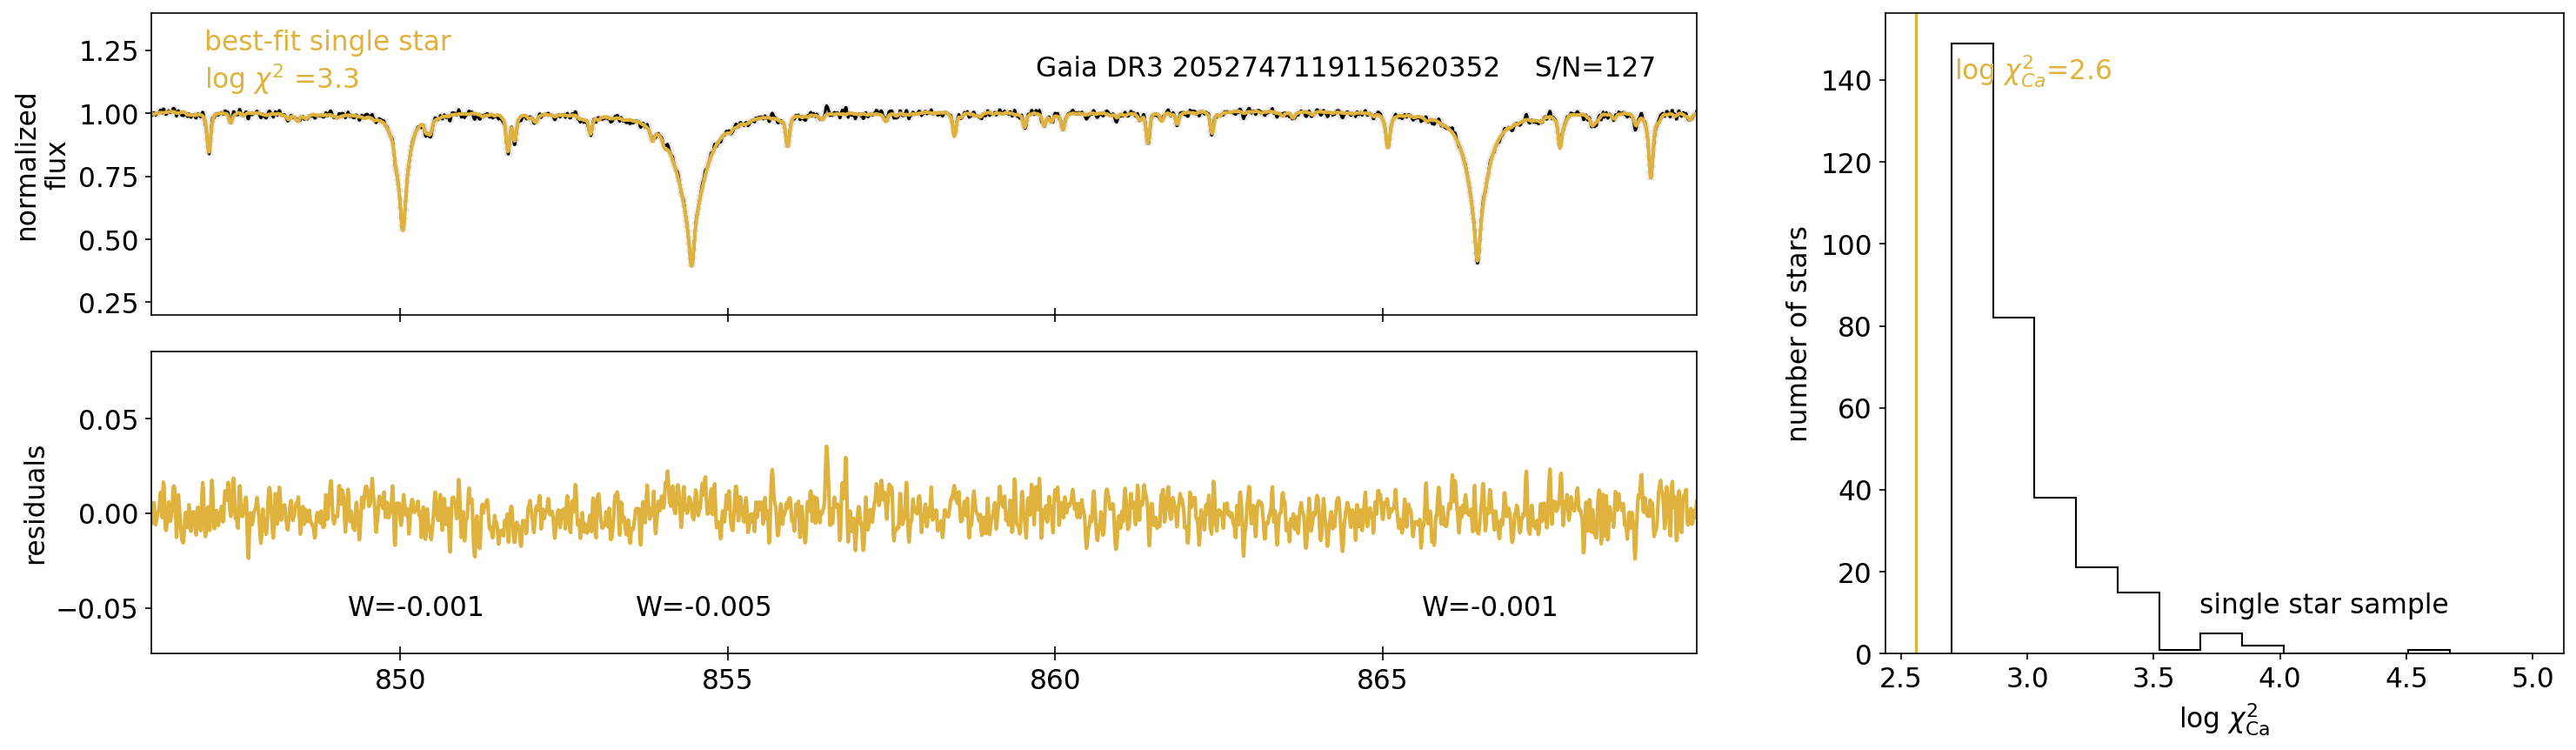

In [4]:
spec.activity_plot()

Finally, we can look for signs of an unresolved "spectral" binary:

<Figure size 1950x1050 with 0 Axes>

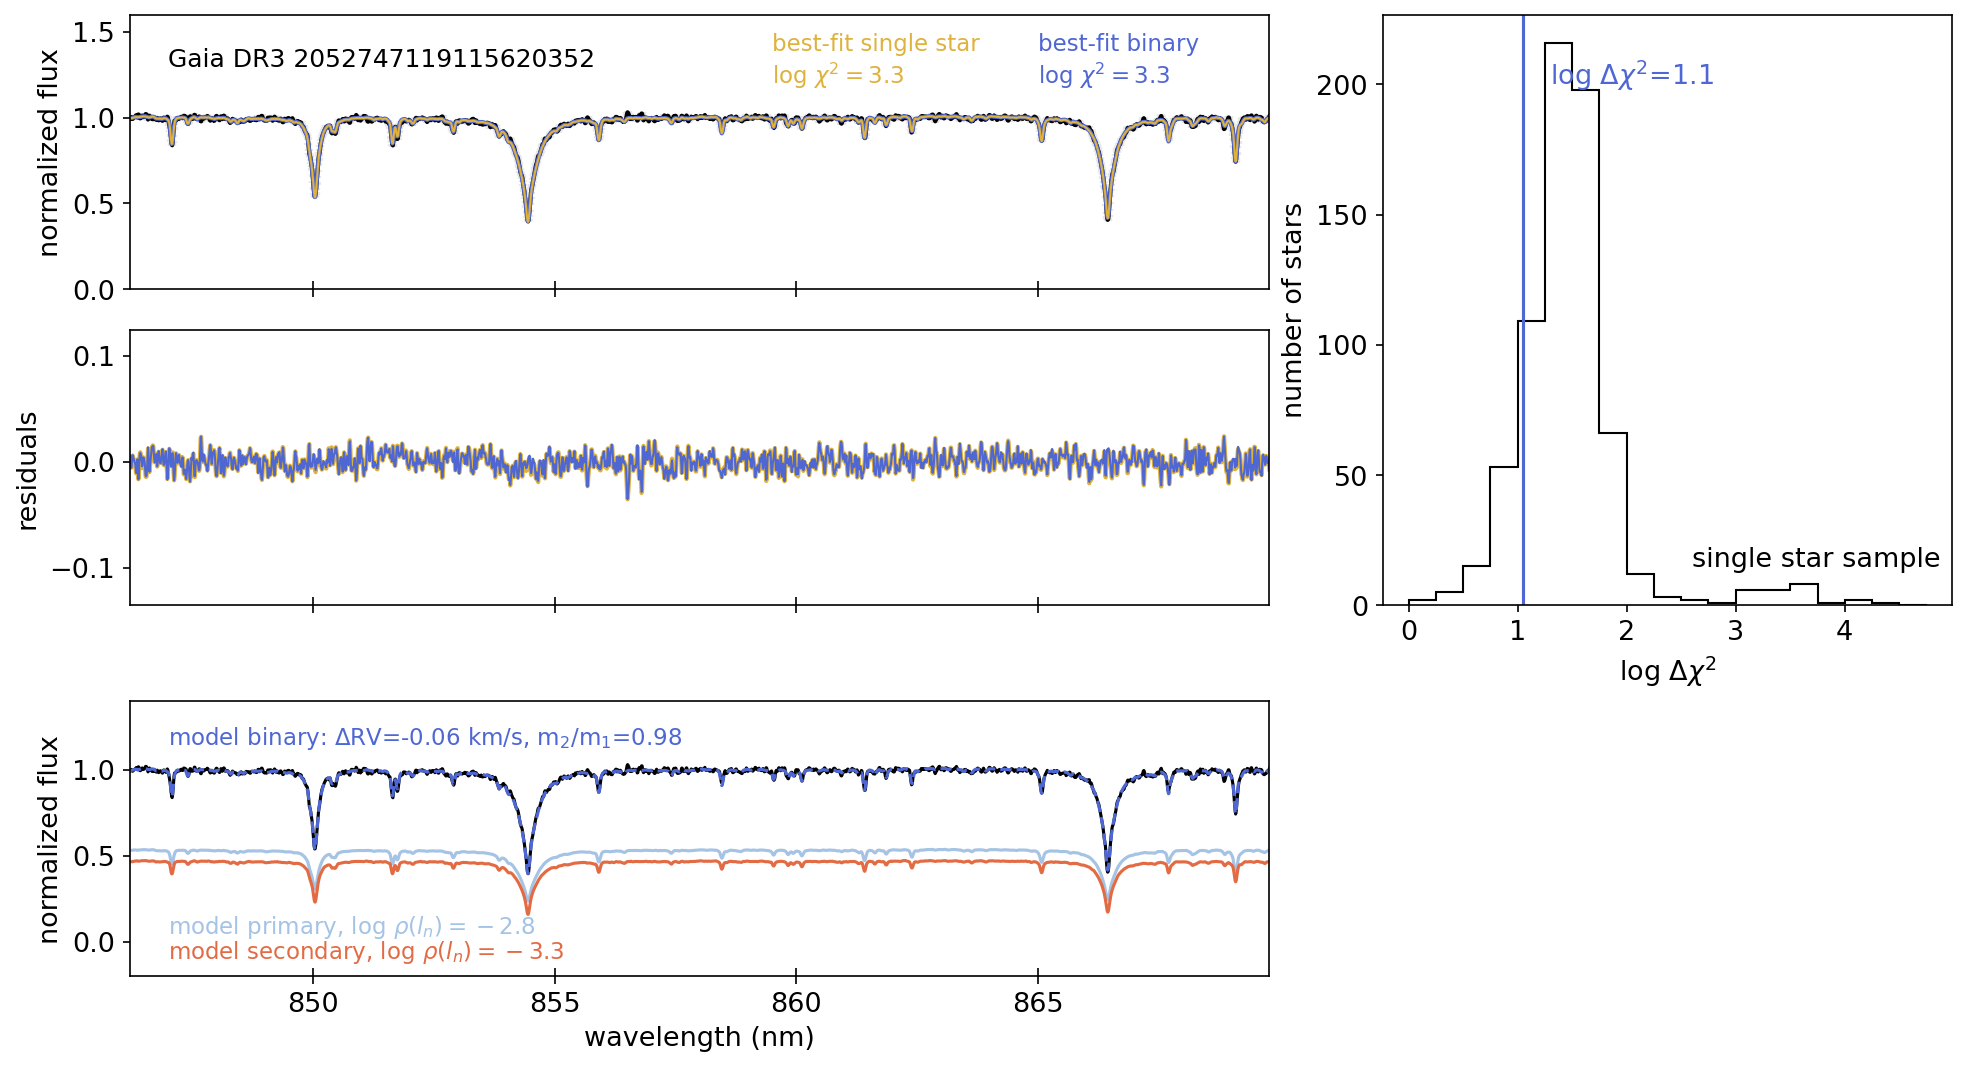

In [5]:
spec.binary_plot()

We see from these plots that the star doesn't show particularly strong signs of activity, binarity, or other deviations from what we'd expect for main sequence single stars. For examples of spectra for more anomalous spectra, see Section 6 of Angelo et al. (2024). 